## Môn: Nhập môn máy học
 * Bài thực hành: lab06
 * Sinh viên: Huỳnh Thị Bảo Trân
 * MSSV: 19110482

In [1352]:
import pandas as pd
import graphviz
from matplotlib import pyplot as plt
from sklearn import datasets, utils, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

Đọc file CSV dữ liệu thời tiết bằng hàm read_csv của thư viện pandas vào data frame.

In [1353]:
data = pd.read_csv('5-DT_daily_weather.csv')

Mô tả bộ dữ liệu thời tiết: **daily_weather.csv**

Dữ liệu này được thu thập ở một trạm khí tượng ở San Diego, California bằng cách sử dụng các cảm biến đo nhiệt độ, áp suất không khí và độ ẩm. Dữ liệu được quan trắc trong 3 năm, từ 09/2011 đến 09/2014.

Mục đích: dựa trên dữ liệu về điều kiện môi trường buổi sáng (9am) để dự đoán độ ẩm buổi chiều cao hay thấp (3pm).

In [1354]:
data.columns   # Xem các thuộc tính của mẫu dữ liệu

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [1355]:
data.head()    # Xem các mẫu dữ liệu đầu tiên

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [1356]:
data.isnull().any(axis=1).head()   # Kiểm tra các dữ liệu có Null hay không

0    False
1    False
2    False
3    False
4    False
dtype: bool

Hàm ``any()``: kiểm tra giá trị phần tử trong mảng có phải là True hay không
- ``axis = 0``: kiểm tra tất cả các phần tử theo cột (column-wise)
- ``axis = 1``: kiểm tra tất cả các phần tử theo dòng (row-wise)

In [1357]:
data[data.isnull().any(axis=1)].head()   # Kiểm tra các phần tử theo dòng có thuộc tính chứa giá trị Null / NaN)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [1358]:
del data['number']   # Xoá cột mang thuộc tính 'number' do không có ích 

In [1359]:
before_rows = data.shape[0]   # Số dòng của dữ liệu sau khí xoá thuộc tính 'number'
print(before_rows)

1095


In [1360]:
data = data.dropna()          # Xoá các dòng có thuộc tính chứa giá trị Null / NaN)

In [1361]:
after_rows = data.shape[0]    # Số dòng của dữ liệu sau khí xXoá các dòng có thuộc tính chứa giá trị Null / NaN)
print(after_rows)

1064


Xây dựng label dựa trên thuộc tính 'relative_humidity_3pm'
- Nếu 'relative_humidity_3pm > 24.99': label = 1 (độ ẩm cao)
- Nếu 'relative_humidity_3pm <= 24.99': label = 0 (độ ẩm thấp)


In [1362]:
clean_data = data.copy()                                                              # Sao chép dữ liệu
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] >24.99) *1   # Tạo thuộc tính 'high_humidity_label' và gán giá trị label (True * 1 = 1; False * 1 = 0)
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

In [1363]:
y = clean_data[['high_humidity_label']].copy()   # Gán label vào biến y
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [1364]:
clean_data['relative_humidity_3pm'].head()     # Xen các giá trị 'relative_humidity_3pm' trong tập dữ liệu

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [1365]:
y.head()     # Xen các giá trị label y tương ứng

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


Lưu các 'giá trị buổi sáng (9am)' dùng làm thuộc tính để huấn luyện mô hình decision tree

In [1366]:
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [1367]:
x=clean_data[morning_features].copy()   # Lấy giá trị từ các thuộc tính buổi sáng 9am.
x.columns     # Xem các thuộc tính của x

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [1368]:
y.columns     # Xem các thuộc tính của label y

Index(['high_humidity_label'], dtype='object')

In [1369]:
# Phân tập dữ liệu và label thành tập train và tập test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [1370]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10)        # Khởi tạo mô hình Decision Tree
humidity_classifier.fit(X_train,y_train)                          # Dùng x và y để huấn luyện mô hình

DecisionTreeClassifier(max_leaf_nodes=10)

In [1371]:
y_predicted = humidity_classifier.predict(X_test)

In [1372]:
y_predicted[:10]                       # Label dự đoán trên tập test dựa trên mô hình học được

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [1373]:
y_test['high_humidity_label'][:10]     # Label thực tế của tập test

130    1
480    0
489    0
598    1
702    1
867    1
777    0
26     1
743    1
735    1
Name: high_humidity_label, dtype: int64

In [1374]:
accuracy_score(y_test,y_predicted)*100  # Tính độ chính xác của mô hình trên tập test

85.79545454545455

In [1375]:
from sklearn import tree
tree.export_graphviz(humidity_classifier, out_file='tree.dot')      # Lưu model vào 'tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])   # Chuyển model sang dạng png

0

Lưu ý: để chạy được **dot** command cần phải cài đặt thư viện **graphviz**, ví dụ trên MacOS ``brew install graphviz``

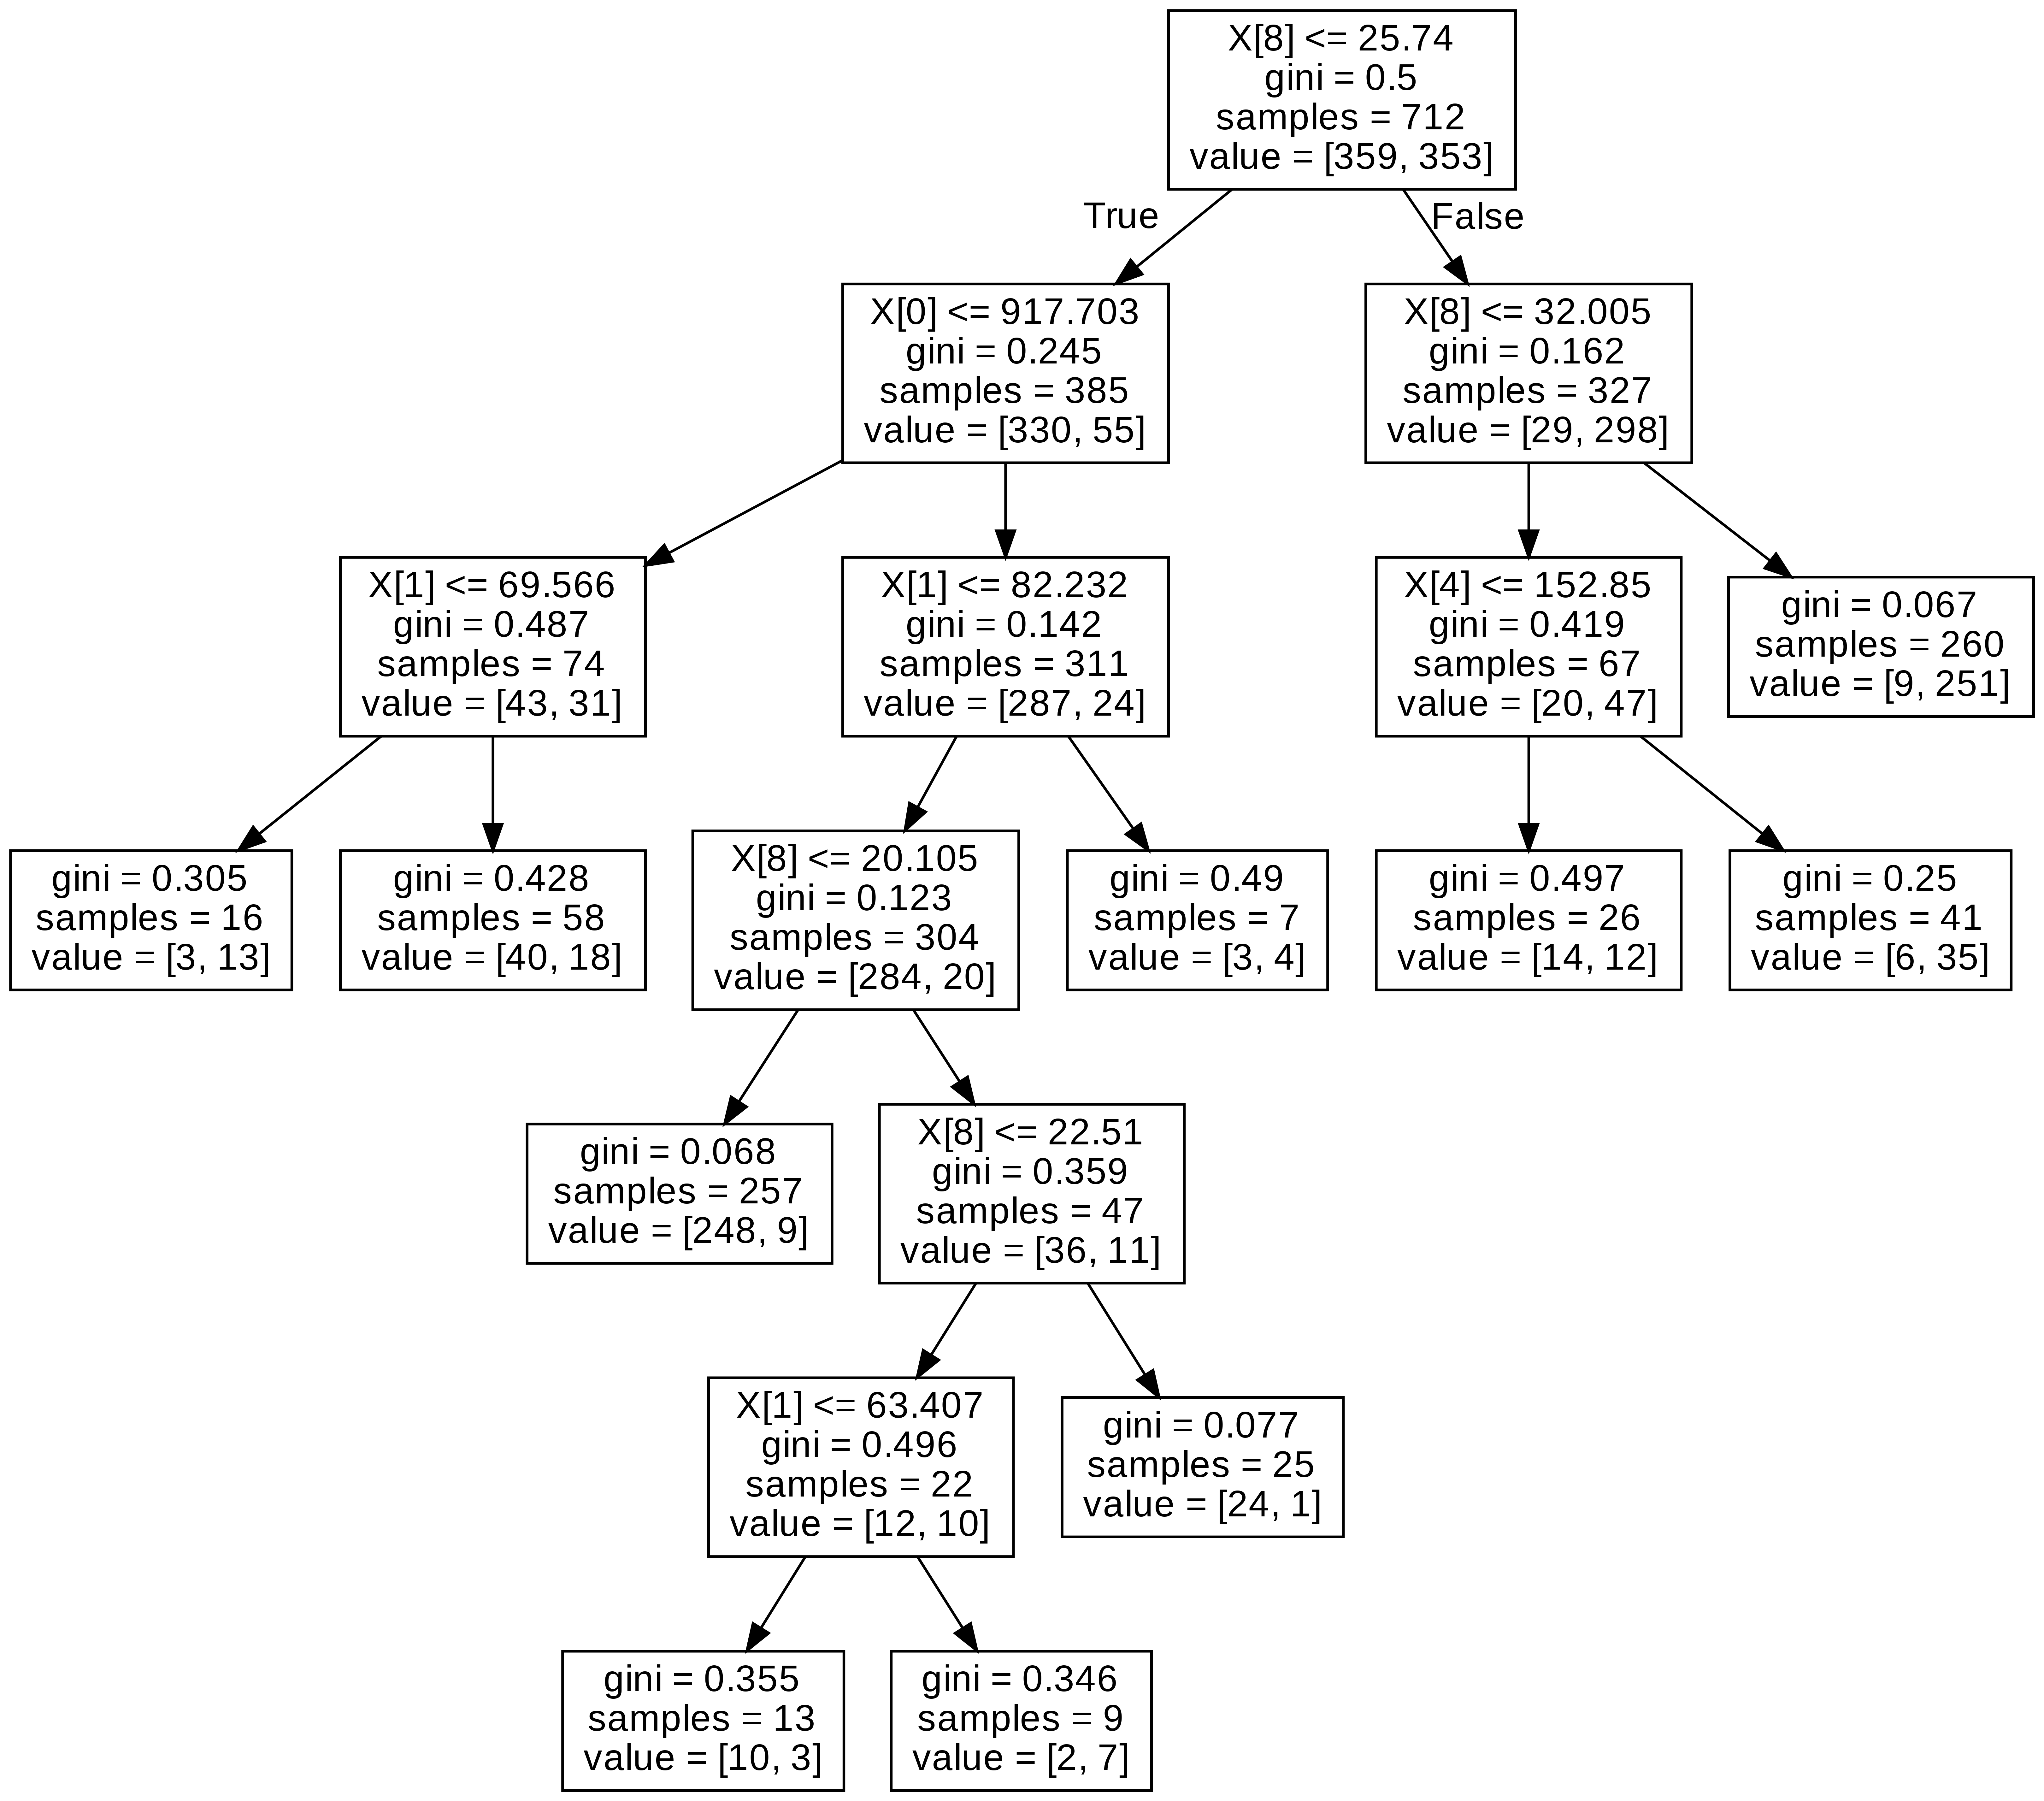

In [1376]:
from IPython.display import Image
Image(filename = 'tree.png')     # Load file 'tree.png'

Ý nghhĩa các giá trị:
- ``gini``: độ hỗn loạn entropy của các label trong nhóm.
    - Nếu ``gini = 0``: tập thuần nhất (pure set)
    - Nếu ``gini > 0``: tập không thuần nhất (impure set)
- ``samples``: số lượng mẫu dữ liệu xuất hiện tại nhánh đó.
- ``value``: phân phối ``samples`` vào các lớp tại nhánh đó (tổng các ``value`` = ``samples``) 
    


# Bài làm

Yêu cầu:
1. Hãy tự đọc data tập dữ liệu Iris (có thể dùng thư viên cho nhanh),
2. Tiến hành chạy thuật toán Decision Tree trên data đã chuẩn hóa theo MinMaxScaler và data chưa chuẩn hóa (so sánh hai kết quả trên accuracy, recall, precision)
3. Cho biết thuật toán mà hình đang dùng gồm những hyper-parameters gì?
4. Cho biết khi tăng depth lên thì được lợi hại gì? Nếu có điểm yếu thì có cách khắc phục không (dùng thuật toán gì chẳng hạn)?
5. Vẽ cây ra?

1, Đọc và xử lý dữ liệu

In [1377]:
df = datasets.load_iris()
dataset = pd.DataFrame(df.data)
dataset['class'] = df.target
dataset.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [1378]:
dataset.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [1379]:
dataset.isnull().any(axis = 1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [1380]:
dataset[dataset.isnull().any(axis = 1)].head()

,sepal_len,sepal_wid,petal_len,petal_wid,class


In [1381]:
dataset = dataset.dropna()

In [1382]:
after_rows = dataset.shape[0]
print(after_rows)

150


2.1 Thuật toán Decision Tree với data chưa được chuẩn hóa

In [1383]:
data_features = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
x = dataset[data_features]
x.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'], dtype='object')

In [1384]:
target_features = ['class']
y = dataset[target_features]
y.columns

Index(['class'], dtype='object')

In [1385]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [1386]:
clf = DecisionTreeClassifier(random_state = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [1387]:
y_predicted = clf.predict(X_test)

In [1388]:
y_predicted[:10]

array([1, 2, 0, 2, 1, 0, 1, 1, 1, 2])

In [1389]:
y_test[:10]

,class
73,1
108,2
26,0
116,2
60,1
42,0
68,1
129,2
56,1
147,2


In [1390]:
accuracy_score(y_test, y_predicted)*100

98.0

In [1391]:
recall_score(y_test, y_predicted, average = 'macro')*100

98.14814814814815

In [1392]:
precision_score(y_test, y_predicted, average = 'macro')*100

97.61904761904762

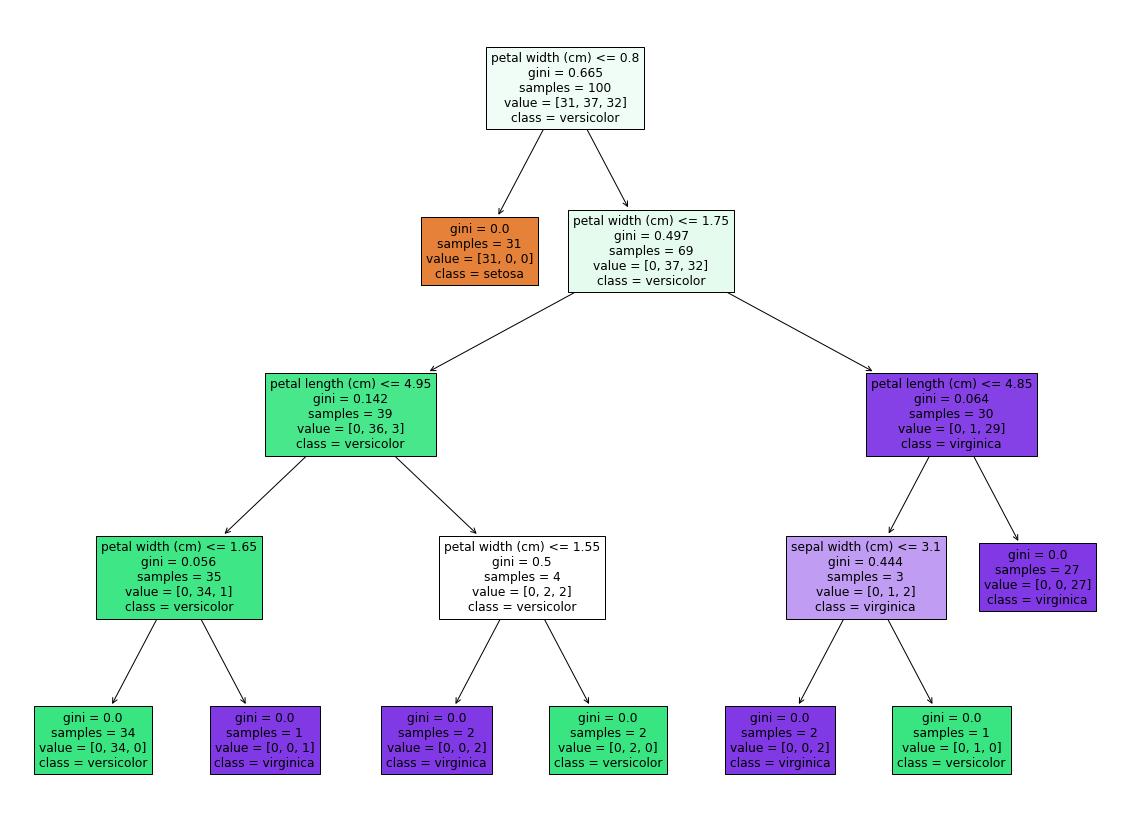

In [1393]:
fig = plt.figure(figsize = (20, 15))
_ = tree.plot_tree(clf, feature_names = df.feature_names, class_names = df.target_names, filled = True)

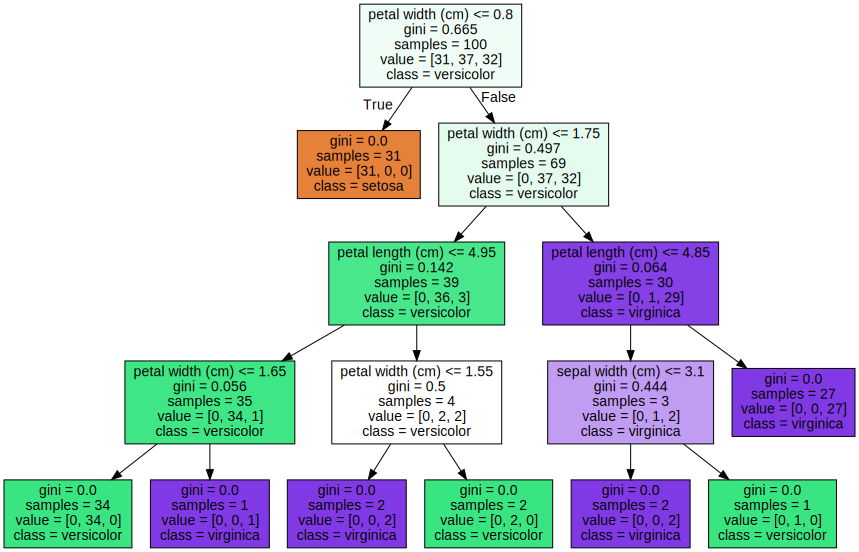

In [1394]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = df.feature_names, class_names = df.target_names, filled = True)

graph = graphviz.Source(dot_data, format = 'png')
graph

2.2 Thuật toán Decision Tree với data đã được chuẩn hóa

In [1395]:
scaler = MinMaxScaler()
model = scaler.fit(dataset)
scaled_data = model.transform(dataset)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [1396]:
scaled_data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [1397]:
data_features = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
x = scaled_data[data_features]
x.columns

Index(['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'], dtype='object')

In [1398]:
target_features = ['class']
y = scaled_data[target_features]
y.columns
y

,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,1.0
146,1.0
147,1.0
148,1.0


In [1399]:
scaled_data.isnull().any(axis = 1).head()
scaled_data = scaled_data.dropna()
scaled_data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [1400]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
print(utils.multiclass.type_of_target(encoded))

multiclass


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1401]:
X_train, X_test, y_train, y_test = train_test_split(x, encoded, test_size = 0.33)

In [1402]:
clf = DecisionTreeClassifier(random_state = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [1403]:
y_predicted = clf.predict(X_test)

In [1404]:
y_predicted[:10]

array([0, 2, 2, 0, 0, 0, 2, 1, 0, 2])

In [1405]:
y_test[:10]

array([0, 2, 2, 0, 0, 0, 2, 1, 0, 2])

In [1406]:
accuracy_score(y_test, y_predicted)*100

98.0

In [1407]:
recall_score(y_test, y_predicted, average = 'macro')*100

98.03921568627452

In [1408]:
precision_score(y_test, y_predicted, average = 'macro')*100

98.14814814814815

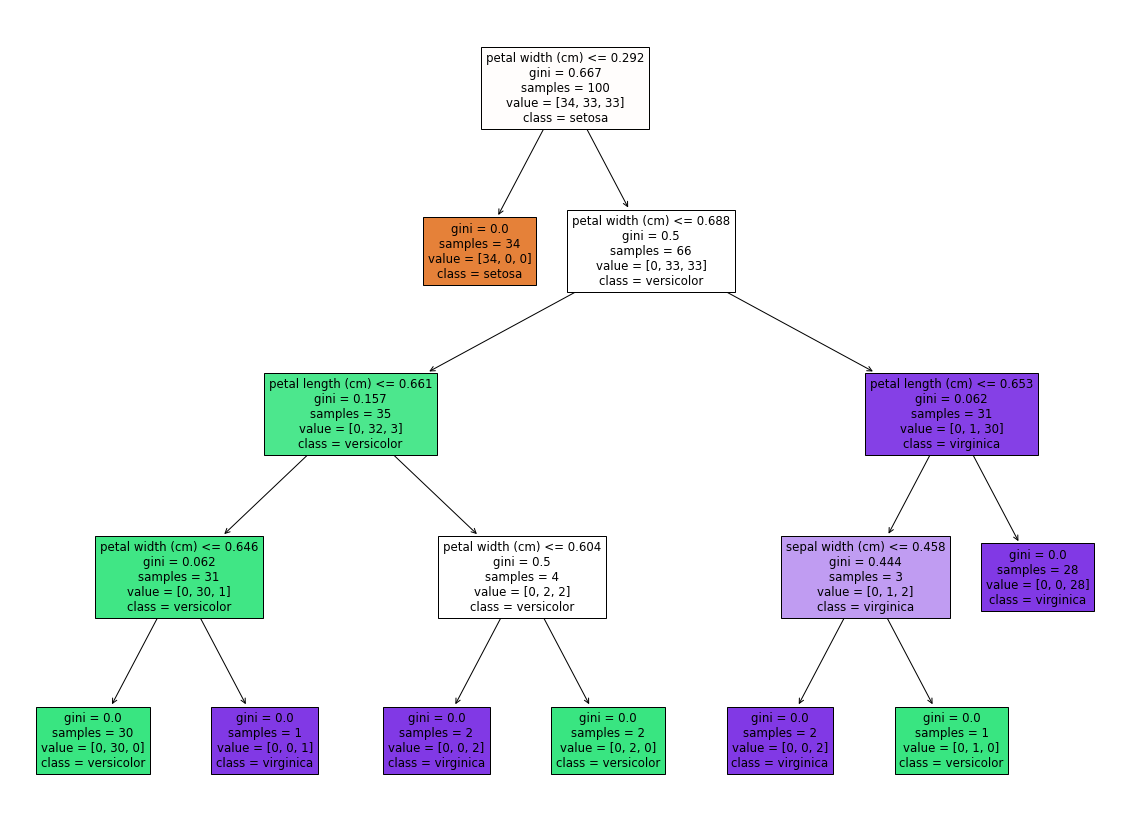

In [1409]:
fig = plt.figure(figsize = (20, 15))
_ = tree.plot_tree(clf, feature_names = df.feature_names, class_names = df.target_names, filled = True)

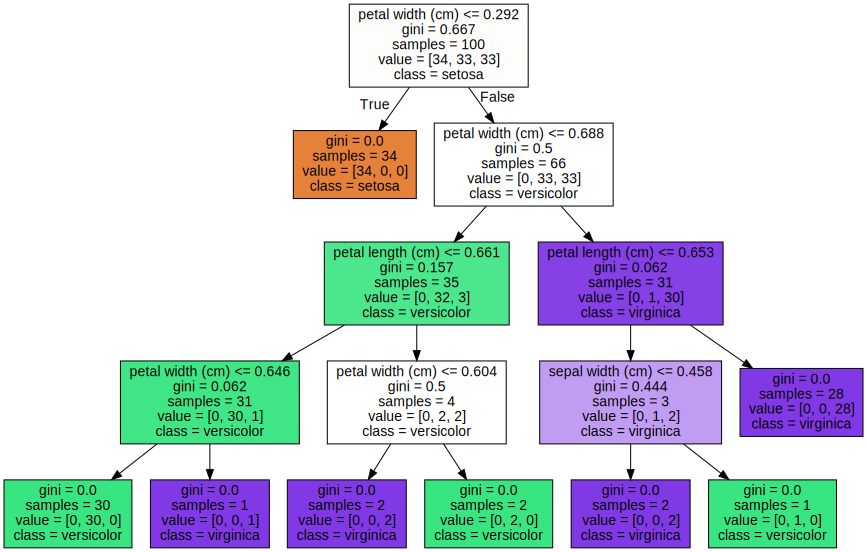

In [1410]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = df.feature_names, class_names = df.target_names, filled = True)

graph = graphviz.Source(dot_data, format = 'png')
graph

2.3 Nhận xét: ta thấy, có sự chênh lệch để sử dụng thuật toán Decision Tree với data đã được chuẩn hóa theo MinMaxScaler và data chưa được chuẩn hóa.       
 * Về accuary, ở data chưa được chuẩn hóa là khoảng 90-96.0% và ở data đã được chuẩn hóa là khoảng 92.0-98.0%, cho thấy sử dụng thuật toán Decision Tree với data đã được chuẩn hóa MinMaxScaler tốt hơn.       
 * Về recall, ở data chưa được chuẩn hóa là khoảng 90-96.0% và ở data đã được chuẩn hóa là khoảng 92.0-98.0%, cho thấy sử dụng thuật toán Decision Tree với data đã được chuẩn hóa MinMaxScaler tốt hơn.     
 * Về precision, ở data chưa được chuẩn hóa là khoảng 90-96.0% và ở data đã được chuẩn hóa là khoảng 92.0-98.0%, cho thấy sử dụng thuật toán Decision Tree với data đã được chuẩn hóa MinMaxScaler tốt hơn.  



3.  Những hyper-parameters của thuật toán Decision Tree được sử dụng:
 * Với data chưa được chuẩn hóa: petal width, petal length, sepal length
 * Với data đã được chuẩn hóa MinMaxScaler: petal width, petal length, sepal length

4. Khi tăng depth lên thì model học quá nhiều từ dữ liệu, từ đó dễ dẫn tới bị overfitting, do đó ta có thể sử dụng thêm thuật toán Gradient Boosting để cải thiện và lựa chọn depth cho phù hợp với thuật toán.